<a href="https://colab.research.google.com/github/dauparas/tensorflow_examples/blob/master/machine_learning_bishop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is a notebook for reading "Pattern Recognition and Machine Learning" by Christopher M. Bishop.

# Chapter 1: Introduction

**Pattern recognition is fundamental to mathematics and science.** For example given a sequence of numbers $1, 3, 5, 7,...$ one can easily spot that the next number is generated by adding $2$ to the previous number. One could also see a pattern in an oscillating simple pendulum. The period of the pendulum for small oscillations is given by $T = 2\pi \sqrt{L/g}$ where $L$ is the length of the pendulum and $g$ acceleration due to gravity. Spotting patterns allows us to predict the future!


---


The field of patern recognition is concerned with the automatic discovery of regularities in the data through the use of computer algorithms. Generalization is a central goal in pattern recognition.


---

Supervised learning: classification, regression.

Unsupervised learning: clusterring, density estimation, visualization.

Reinforcement learning.

# 1.1 Example: Polynomial Curve Fitting

In [0]:
#Import libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [0]:
x = np.linspace(0, 1, 11)
N = x.shape[0]
y = np.sin(2*np.pi*x) + 0.2*np.random.randn(N)

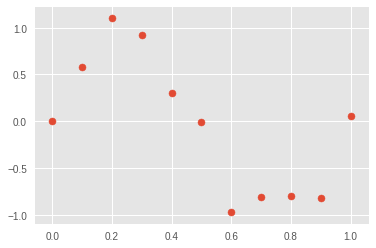

In [225]:
plt.scatter(x, y);

In [0]:
#Helper function
def batch_generator(features, labels, batch_size):
  """Function to create python generator to shuffle and split features and labels into batches along the first dimension."""
  idx = np.arange(features.shape[0])
  np.random.shuffle(idx)
  for start_idx in range(0, features.shape[0], batch_size):
    end_idx = min(start_idx + batch_size, features.shape[0])
    part = idx[start_idx:end_idx]
    yield features[part], labels[part]

In [0]:
#Reset the graph 
tf.reset_default_graph()

#Polynomial degree + 1
#P = 2 is a linear function.
P = 20

x_poly = []
for i in range(P):
  x1 = np.power(x, i)
  x_poly.append(x1)

x_poly = np.asarray(x_poly).T
  

#Parameters
learning_rate = 0.5
batch_size = 11
n_epochs = 1000

#Create placeholders
X = tf.placeholder(tf.float32, shape=[None, P], name='X')
Y = tf.placeholder(tf.float32, shape=[None], name='Y')
#Create variables
A = tf.get_variable('A', shape=[P], dtype=tf.float32, initializer=tf.random_normal_initializer())

#Create a linear model
y_pred = tf.einsum('i, ki->k', A, X)

lam = 0.0
#Define a loss function
loss = 0.5*tf.reduce_sum(tf.square(y_pred-Y), axis=0) + lam*tf.reduce_sum(tf.square(A))

#Define an optimizer
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

In [299]:
#Create a TF session:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for i in range(n_epochs):
    gen = batch_generator(x_poly, y, batch_size) #create batch generator
    total_loss = 0
    for j in range(np.int(x.shape[0]/batch_size)):
      x_batch, y_batch = gen.__next__()
      _, batch_loss = sess.run([optimizer, loss], feed_dict={X: x_batch, Y: y_batch})
      total_loss += batch_loss
    if (i+1)% 50 == 0 or i == 0:
      print('Epoch: {0}, Loss: {1}'.format((i+1), total_loss))
    a = sess.run([A])
    a = np.squeeze(np.asarray(a))

Epoch: 1, Loss: 6.9257354736328125
Epoch: 50, Loss: 0.8402787446975708
Epoch: 100, Loss: 0.7453343868255615
Epoch: 150, Loss: 0.6794025897979736
Epoch: 200, Loss: 0.6185773015022278
Epoch: 250, Loss: 0.565704345703125
Epoch: 300, Loss: 0.521868109703064
Epoch: 350, Loss: 0.48641717433929443
Epoch: 400, Loss: 0.4578586518764496
Epoch: 450, Loss: 0.43448105454444885
Epoch: 500, Loss: 0.4147196114063263
Epoch: 550, Loss: 0.39732497930526733
Epoch: 600, Loss: 0.38139456510543823
Epoch: 650, Loss: 0.3663322925567627
Epoch: 700, Loss: 0.3517800271511078
Epoch: 750, Loss: 0.3375454843044281
Epoch: 800, Loss: 0.32354456186294556
Epoch: 850, Loss: 0.3097561001777649
Epoch: 900, Loss: 0.29619425535202026
Epoch: 950, Loss: 0.282889723777771
Epoch: 1000, Loss: 0.2698800265789032


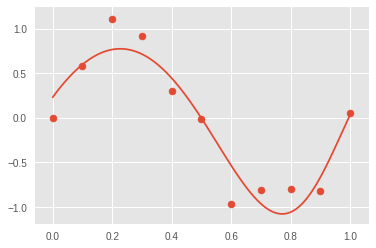

In [300]:
p = np.poly1d(a[::-1])
x_eval = np.linspace(0,1, 100)
plt.plot(x_eval, p(x_eval))
plt.scatter(x, y);

Notice that even without regularization the model does no overfit too much. I might be because the stochastic gradient descent has not properly converged!

# 1.2 Probability Theory



*   Sum rule: $p(X) = \sum_Y p(X, Y)$
*   Product rule: $p(X, Y) = p(Y\vert X)p(X)$

Applying the second rule one gets the Bayes' theorem $p(Y\vert X) = \frac{p(X\vert Y)p(Y)}{p(X)}$.

Two random variabes $X, Y$ are independent if and only if $p(X, Y)=p(X)p(Y)$.

The maximum of a probability density $p(x)$  is dependent on the choice of variable, because changing variables multiplies the probability density by a Jacobian of the transformation.


*   Expectation 
*   Variance
*  Covariance

**Thomas Bayes** (1701 - 1761) formulated Bayes' Theory for the case of a uniform prior. **Pierre-Simon Laplace** (1749 - 1827) independently rediscovered the theory in general form. 

Suppose we have a model to describe some phenomenon parameterised by $w$. We observe data $D$ and ask a question how our initial model parameters should be altered to incorporate the data. The answer is given by Bayes' formulation

$p(w\vert D) = \frac{p(D\vert w)p(w)}{p(D)}.$



*   $p(w)$ is called a prior distribution.
*   $p(D\vert w)$ is called a likelihood function.
*   $p(D)=\int p(D\vert w)p(w)dw$ is called an evidence.
*  $p(w\vert D)$ is called a posterior distribution.

From the Bayesian viewpoint the parameter $w$ is given by a distribution, whereas in a freuenist setting, $w$ is considered to be fixed whose values are determined by some estimator (e.g. maximum likelihood estimator) of the data and error bars are obtained considering the distribution of possible data sets $D$.



*   Bootstrap is a process in which multiple data sets are created by sampling with replacement from the original data set $D$..
*   Bayesian methods based on poor choices of prior can give poor results with high confidence.



# Distributions


*   Gaussian
*   MAP: maximum a posterior. Maximising the posterior distribution to find parameters.



The curse of dimensionality